# DSCI 503 - Homework 04
### Matt Snyder

In [39]:
import numpy as np
import math
import matplotlib.pyplot as plt

## Problem 1: Sample Mean and Variance

In [5]:
# Create an array x containing the following integers: 10, 16, 26, 12, 17, 22, 14, 12, 21, 16
x = np.array([10, 16, 26, 12, 17, 22, 14, 12, 21, 16])

# Store the length of this array in a variable n.
n = len(x)

# Calculate the sample mean, storing the result in mean. You may use np.sum() in your calculation.
mean = np.sum(x)/n

# Calculate an array named diff that stores the differences between each value in x and the mean. That is to
# that that diff should contain values (𝑥𝑖− 𝑥̅) for each𝑖 = 1, . . . , 𝑛.
diff = x - mean

# Use diff, n, and np.sum() to find the sample variance. Store the result in a variable named var.
var = np.sum(diff**2) / (n-1)

# Print your results in the format shown below. Make sure that the numerical outputs are aligned with each other
print (f'Sample Mean:     {mean:<6}')
print (f'Sample Variance: {var:<6}')

Sample Mean:     16.6  
Sample Variance: 25.6  


In [7]:
# Use the functions np.mean() and np.var() to calculate the sample mean and sample variance of x, storing the result in
# variables named mean_np and var_np. In order to get the sample variance (as opposed to the population variance) you
# will need to set the ddof parameter of np.var() to 1.
mean_np = np.mean(x)
var_np = np.var(x, ddof=1)

# Print the results in the same format as above
print (f'Sample Mean:     {mean:<6}')
print (f'Sample Variance: {var:<6}')

Sample Mean:     16.6  
Sample Variance: 25.6  


## Problem 2: Scoring a Regression Model

In [8]:
def find_sse(true_y, pred_y):
    """ The parameter true_y is expected to be an array of observed 𝑦 values 
        while pred_y is expected to be an array of predicted 𝑦 values generated by a regression model. 
        Returns the SSE score for the regression model
    """
    result = np.sum((true_y - pred_y)**2)
    return result

In [13]:
# define numpy arrays true_y, pred_1, and pred_2
true_y = np.array([22.1, 17.9, 16.5, 14.3, 19.8, 23.7, 22.0, 18.4, 25.7, 19.2])
pred_1 = np.array([21.4, 16.7, 17.9, 12.1, 22.1, 25.1, 21.7, 19.3, 23.4, 19.9])
pred_2 = np.array([20.7, 18.1, 16.9, 13.6, 21.9, 24.8, 20.3, 21.1, 24.8, 18.4])

# Use find_sse() to calculate the SSE score for each model, storing the results in variables named sse_1 and sse_2.
sse_1 = find_sse(true_y, pred_1)
sse_2 = find_sse(true_y, pred_2)

#Print your results in the format shown below. Round your numerical outputs to 2 decimal places.
print (f'Model 1 SSE: {sse_1:<6.2f}')
print (f'Model 1 SSE: {sse_2:<6.2f}')

Model 1 SSE: 22.66 
Model 1 SSE: 19.90 


## Problem 3: Scoring a Classification Model

In [16]:
def find_accuracy(true_y, pred_y):
    """ The parameter true_y is expected to be an array of observed classes 
        pred_y is expected to be an array of predicted classes generated by a classification model. 
        The function returns the accuracy score for the classification model, as calculated on this set of observations. 
    """
    result = np.sum(true_y == pred_y) / len(true_y)
    return result

In [17]:
# Create arrays named true_diag and pred_diag to store the diagnosis information provided above. 
true_diag = np.array(['P', 'P', 'N', 'N', 'P', 'N', 'N', 'N', 'P', 'N', 'N', 'N', 'N', 'P', 'P', 'N', 'N',
'N', 'N', 'N'])
pred_diag = np.array(['N', 'P', 'N', 'P', 'P', 'N', 'P', 'N', 'P', 'N', 'N', 'N', 'P', 'P', 'P', 'N', 'N',
'N', 'P', 'N'])

# Use find_accuracy() to calculate the accuracy of the classification model that generated these these predictions. 
accuracy = find_accuracy(true_diag, pred_diag)

# print the result in the following format:
print (f'Model Accuracy: {accuracy}')

Model Accuracy: 0.75


In [19]:
# Create arrays named true_labels and pred_labels to store the label information provided above. 
true_labels = np.array(['dog', 'dog', 'cat', 'dog', 'cat', 'cat', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat',
'cat', 'dog', 'dog', 'dog', 'dog', 'cat', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat'])
pred_labels = np.array(['dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat',
'cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'cat'])

# Use find_accuracy() to calculate the accuracy of the classification model that generated these these predictions. 
accuracy = find_accuracy(true_labels, pred_labels)

# print the result in the following format:
print (f'Model Accuracy: {accuracy}')

Model Accuracy: 0.875


## Problem 4: Classification Report

In [33]:
def classification_report(true_y, pred_y):
    """ This function will print several metrics used to evaluation the performance of a classification model 
        based on the supplied values of true_y and pred_y. 
    """
    # Create a local variable called classes that stores the unique values that appear in true_y. 
    # value in classes[0] is the "negative class" and the value in classes[1] is the "positive class".
    classes = np.unique(true_y)
    
    # Use find_accuracy() to calculate and store the model's accuracy.
    accuracy = find_accuracy(true_y, pred_y)
    
    # Use NumPy (and no loops) to calculate TP, FP, TN, and FN.
    # TP if it was predicted to be in the positive class, and actually was in the positive class.
    TP = np.sum((pred_y == classes[0]) & (true_y == classes[0]))
    # FP if it was predicted to be in the positive class, but actually was in the negative class.
    FP = np.sum((pred_y == classes[0]) & (true_y == classes[1]))
    # TN if it was predicted to be in the negative class, and actually was in the negative class.
    TN = np.sum((pred_y == classes[1]) & (true_y == classes[1]))
    # FN if it was predicted to be in the negative class, but actually was in the positive class.
    FN = np.sum((pred_y == classes[1]) & (true_y == classes[0]))

    #Calculate the positive precision, positive recall, negative precision, and negative recall.

    positive_precision = TP / (TP + FP)
    positive_recall = TP / (TP + FN)
    negative_precision = TN / (TN + FN)
    negative_recall = TN / (TN + FP)

    # Print several lines displaying the results of these calculations, as shown below. 
    print ('Positive Class:     ' + classes[0])
    print ('Negative Class:     ' + classes[1])
    print()
    print (f'Accuracy:           {accuracy:<6.4f}')
    print (f'Positive Precision: {positive_precision:<6.4f}')
    print (f'Positive Recall:    {positive_recall:<6.4f}')
    print (f'Negative Precision: {negative_precision:<6.4f}')
    print (f'Negative Recall:    {negative_recall:<6.4f}')



In [34]:
# Use the classification_report() function to display a report for the medical diagnosis model from Problem 3.
classification_report(true_diag, pred_diag)

Positive Class:     N
Negative Class:     P

Accuracy:           0.7500
Positive Precision: 0.9091
Positive Recall:    0.7143
Negative Precision: 0.5556
Negative Recall:    0.8333


In [35]:
# Use the classification_report() function to display a report for the image classification model from Problem 3.
classification_report(true_labels, pred_labels)

Positive Class:     cat
Negative Class:     dog

Accuracy:           0.8750
Positive Precision: 0.9167
Positive Recall:    0.8462
Negative Precision: 0.8333
Negative Recall:    0.9091


## Problem 5: Transformation of Random Variables

In [37]:
# Use numpy to set a seed of 1. 
np.random.seed(1)
# Use np.random.normal to sample 25,000 observations from a normal distribution with a mean of 0 and 
# a standard deviation of 0.4. Name the resulting array X 
X = np.random.normal(loc=0, scale=0.4, size=25000)

# Assume that 𝑌 = 𝑒𝑋. Use a numpy function to create an array Y based on the sampled values in X.
Y = np.exp(X)

# Use np.mean() and np.std() (with ddof=1) to calculate the sample mean and sample standard deviation of both X and
# Y. Print the results in the format shown below, with the numerical outputs left-aligned and rounded to four decimal places.
mean_X = np.mean(X)
std_dev_X = np.std(X)
mean_Y = np.mean(Y)
std_dev_Y = np.std(Y)

print(f'Sample Mean of X:    {mean_X:<6.4f}')
print(f'Sample Std Dev of X: {std_dev_X:<6.4f}')
print(f'Sample Mean of Y:    {mean_Y:<6.4f}')
print(f'Sample Std Dev of Y: {std_dev_Y:<6.4f}')

Sample Mean of X:    0.0025
Sample Std Dev of X: 0.4002
Sample Mean of Y:    1.0862
Sample Std Dev of Y: 0.4537


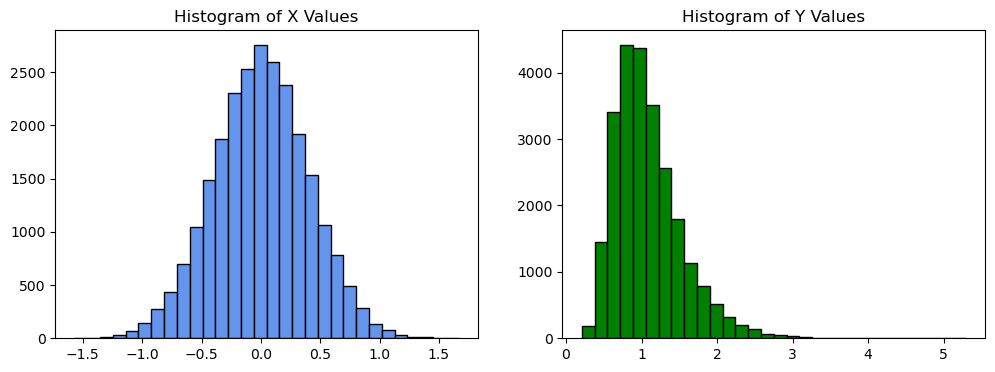

In [43]:
# Create a single figure with two side-by-side subplots, each of which contains a histogram. 
# The figure size should be set to [12, 4].
plt.figure(figsize=[12,4])

# Both histograms should have 30 bins and an edgecolor set to black.
# Select different named colors for the bars in the two histograms.
# The titles of the histograms should be set to "Histogram of X Values" and "Histogram of Y Values", as

# The left subplot should contain a histogram of values in X 
plt.subplot(1,2,1)
plt.hist(X, edgecolor='black', color='cornflowerblue', bins=30)
plt.title('Histogram of X Values')

# The right subplot should contain a histogram of values in Y. 
plt.subplot(1,2,2)
plt.hist(Y, edgecolor='black', color='green', bins=30)
plt.title('Histogram of Y Values')

# Make sure to call plt.show() to display your figure.
plt.show()

In [44]:
# Use np.mean() and array comparisons to calculate the proportion of values in Y that are less than 0.5, less than 1, and less than 2.
Y_less_than_point_5 = np.mean(Y < 0.5) # same as summing them and dividing by total
Y_less_than_1 = np.mean(Y < 1)
Y_less_than_point_2 = np.mean(Y < 2)

# Print your results in the format shown below, with the numerical outputs left-aligned and rounded to 4 decimal places.
print (f'Probability that Y is less than 0.5: {Y_less_than_point_5:<6.4f}')
print (f'Probability that Y is less than 1.0: {Y_less_than_1:<6.4f}')
print (f'Probability that Y is less than 2.0: {Y_less_than_point_2:<6.4f}')

Probability that Y is less than 0.5: 0.0410
Probability that Y is less than 1.0: 0.4969
Probability that Y is less than 2.0: 0.9574


## Problem 6: Stochastic Linear Relationships

In [46]:
# Use numpy to set a random seed of 1. 
np.random.seed(1)

# Create an array x_vals by sampling 200 values from a normal distribution with a mean of 10 and a standard deviation of 2.
x_vals = np.random.normal(loc=10, scale=2, size=200)

# Create an array named errors by sampling 200 values from a normal distribution with a mean of 0 and a standard deviation of 1.2.
errors = np.random.normal(loc=0, scale=1.2, size=200)

# Create an array called y_vals according to the equation 𝑌 = 5.1 + 0.9 ⋅ 𝑋 + 𝜀.
y_vals = 5.1 + 0.9 * x_vals + errors

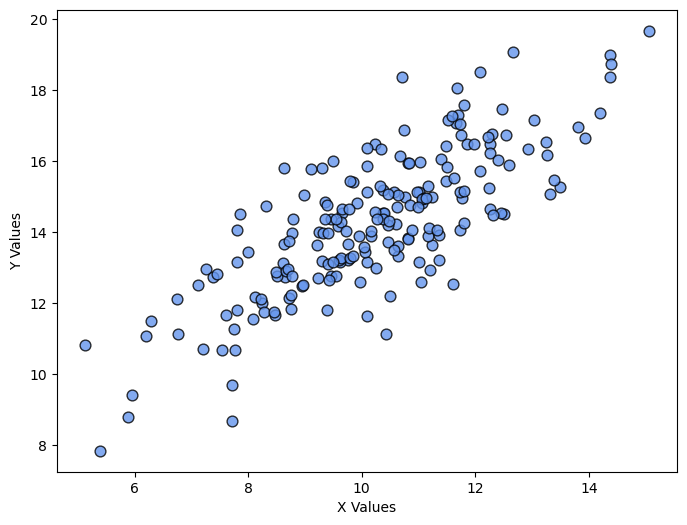

In [48]:
# Create a scatter plot showing the relationship between the values in x_vals and in y_vals. 
# The figure size should be set to [8, 6].
plt.figure(figsize=[8,6])

# Set the point size to 60 and the alpha level to 0.8.
# Set the point border to black and select a named colors for the fill color.
plt.scatter(x=x_vals, y=y_vals, s=60, alpha=0.8, color='cornflowerblue', edgecolor='black')

# Set the labels for the axes to "X Values" and "Y Values
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.show()

In [50]:
# We will now calculate the correlation between 𝑋 and 𝑌. 
# Create an array named diff_x by subtracting the mean of x_vals from each entry of x_vals.
mean_x = np.mean(x_vals)
diff_x = x_vals - mean_x

# Create an array named diff_y by subtracting the mean of y_vals from each entry of y_vals.
mean_y = np.mean(y_vals)
diff_y = y_vals - mean_y

# Use diff_x, diff_y, and np.sum() to calculate the top of the fraction in the definition of 𝑟.
numerator = np.sum(diff_x * diff_y)

# Use diff_x, diff_y, and np.sum() to calculate the bottom of the fraction in the definition of 𝑟.
denominator = np.sqrt( np.sum(diff_x**2) * np.sum(diff_y**2) )
# Calculate 𝑟.
r = numerator / denominator

# Print the result rounding to four decimal places
print (f'Correlation between X and Y: {r:<.4f}')

Correlation between X and Y: 0.7861


## Problem 7: Relationship between Life Expectancy and Per Capita GDP

In [51]:
import pandas as pd
df = pd.read_csv('gapminder_data.txt', sep='\t')
country = df.country.values
year = df.year.values
continent = df.continent.values
population = df.population.values
life_exp = df.life_exp.values
pcgdp = df.gdp_per_cap.values
gini = df.gini.values
df = None

In [53]:
# Create a list named continent_list with the following contents: 'africa', 'americas', 'asia', and 'europe'.
continent_list = ['africa', 'americas', 'asia', 'europe']

# Create a second list named color_list containing four strings representing four named colors. Selected colors that do not
# look very similar, are not too dark, and are not too light.
color_list = ['orange', 'lightgreen', 'steelblue', 'lightcoral']

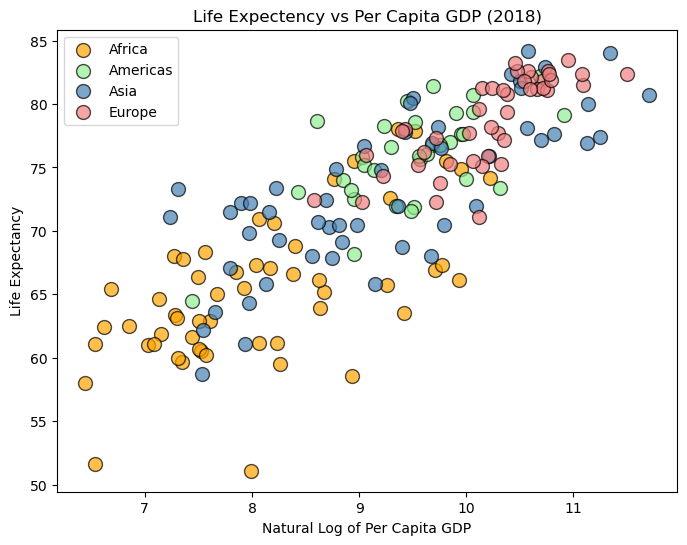

In [64]:
# Set a figure size of [8,6].
plt.figure(figsize=[8,6])

# Use a loop to add the scatter plots for each continent one at a time. 
for i in range(0, len(continent_list)):
    cont = continent_list[i]
    # Use Boolean masking to create a Boolean selection array named sel. The array should indicate which
    # elements correspond to the current continent and the year 2018.
    sel = ((continent == cont) & (year == 2018))

    # Add a scatter plot with x set to the natural log of per capita gdp of the selected countries and with y set
    # to the life expectancy of the selected countries.
    # Set the point size to 100 and the alpha level to 0.7.
    # Set the point border to black and set the fill color to be one of the colors from color_list.
    # Set the label to be the name of the current continent. Use the title() string method to change the first character to uppercase.
    plt.scatter(x=np.log(pcgdp[sel]), y=life_exp[sel], s=100, alpha=0.7, color=color_list[i], edgecolor='black', label=cont.title())

# Set the labels for the x and y axes to 'Natural Log of Per Capita GDP' and 'Life Expectancy'.
plt.xlabel('Natural Log of Per Capita GDP')
plt.ylabel('Life Expectancy')

# Set the title of the figure to 'Life Expectency vs Per Capita GDP (2018)'.
plt.title('Life Expectency vs Per Capita GDP (2018)')

# Add a legend to the plot.
plt.legend()

# Use plt.show() to display the plot.
plt.show()

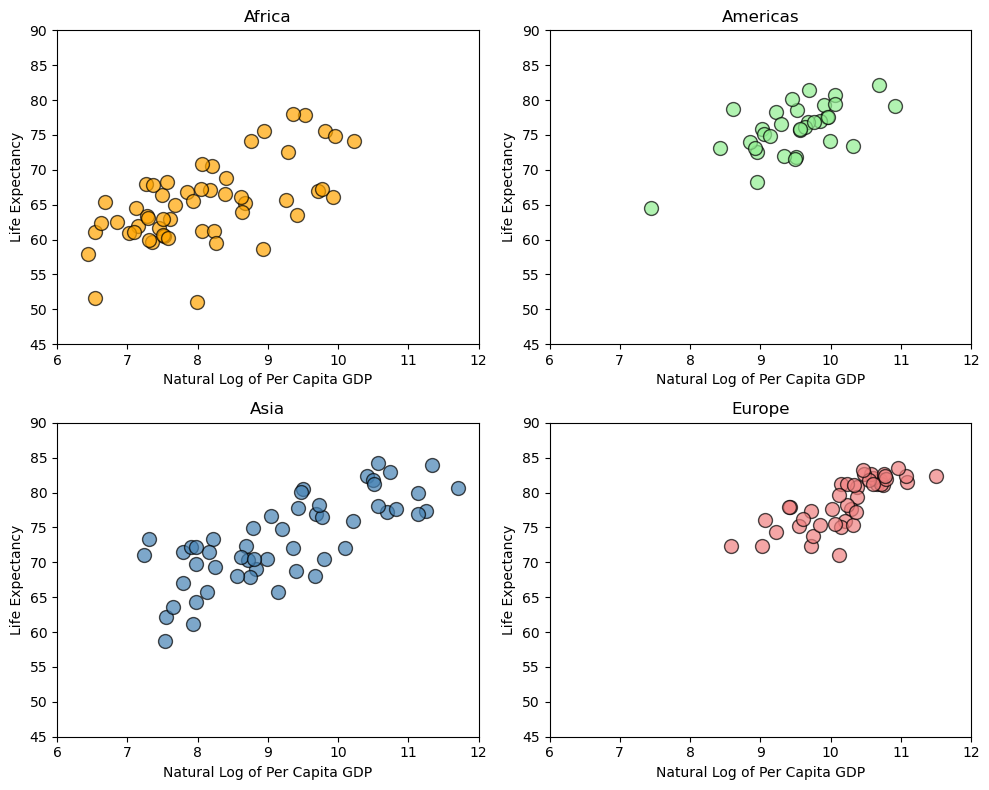

In [67]:
# Use plt.subplot() to split the previous plot into a 2x2 grid of subplots. The plot should be similar to the previous one
# Set a figure size of [10,8].
plt.figure(figsize=[10,8])

for i in range(0, len(continent_list)):
    cont = continent_list[i]
    # Use Boolean masking to create a Boolean selection array named sel. The array should indicate which
    # elements correspond to the current continent and the year 2018.
    sel = ((continent == cont) & (year == 2018))

    # You should call plt.subplot() within the loop to create a new subplot rather than adding points to an existing plot.
    plt.subplot(2,2,i+1)

    plt.scatter(x=np.log(pcgdp[sel]), y=life_exp[sel], s=100, alpha=0.7, color=color_list[i], edgecolor='black')

    # Set the limits for the x-axis of each subplot to be [6,12]. Set the limits for the y-axis to be [45,90].
    plt.xlim([6,12])
    plt.ylim([45,90])
    
    # Each subplot should have the same labels for the x and y axes as in the previous plot.
    plt.xlabel('Natural Log of Per Capita GDP')
    plt.ylabel('Life Expectancy')

    # Remove the label from each scatter plot, but set the title of each subplot to be the name of the continent
    plt.title(cont.title())

# Call plt.tight_layout() before plt.show() to prevent subplot elements from overlapping.
plt.tight_layout()

# Use plt.show() to display the plot.
plt.show()

## Problem 8: Trends by Country

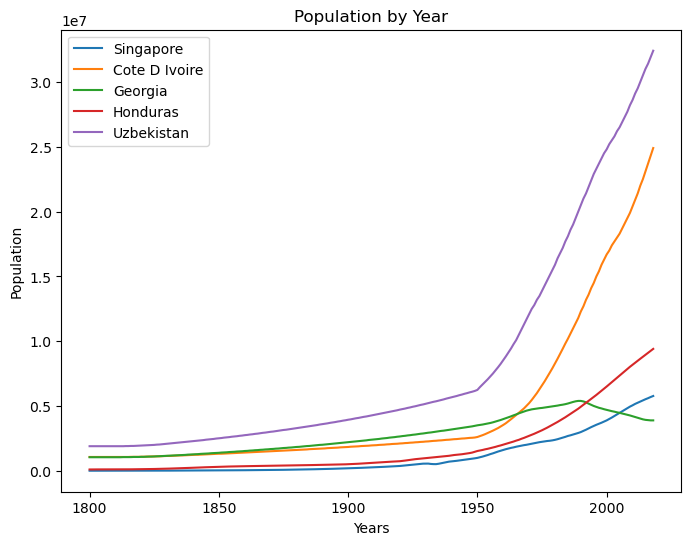

In [78]:
# Select 5 countries represented in the gapminder dataset. For each country, select the entries of population that
# correspond to this country. Keep in mind that the elements of population are already sorted in increasing order by year.
unique_countries = np.unique(country)
unique_years = np.unique(year)
country_indexes = np.random.randint(low=0, high=len(unique_countries), size=5)

# The figure size should be set to [8,4].
plt.figure(figsize=[8,6])

# For each country, add a line plot showing how the populations for those countries have changed over time. All 5
# plots should appear on the same figure. The x coordinates for the points in each of your line plots should be set to the
# range of years from 1800 to 2018. 
for i in country_indexes:
    
    sel = (country == unique_countries[i])
    plt.plot(unique_years, population[sel], label=unique_countries[i].title())
    
# The x-axis should be labeled "Years" and the y-axis should be labeled "Population".
plt.xlabel('Years')
plt.ylabel('Population')

# Each line should have a label indicating the name of the country that line represents. These labels should be display in a legend.
plt.legend()

# The title of the figure should be "Population by Year".
plt.title('Population by Year')

# Use plt.show() to display the figure.
plt.show()

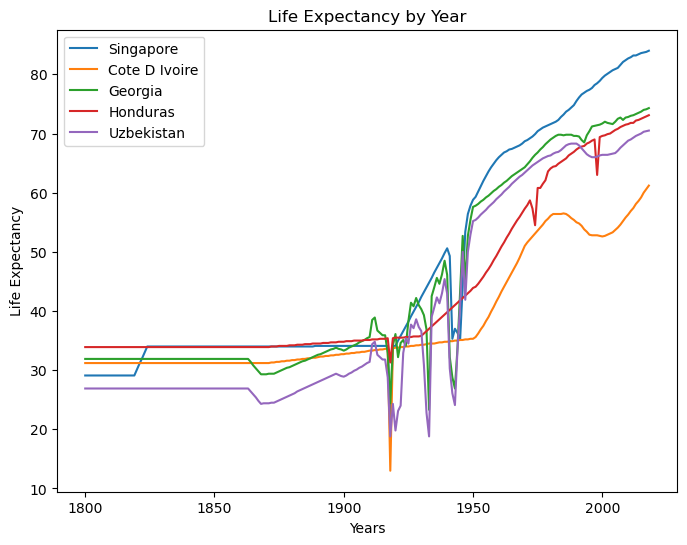

In [80]:
# Repeat the steps from the previous code cell, but replacing population with life_exp. You may use the same 5
# countries, or select different countries. 
plt.figure(figsize=[8,6])
for i in country_indexes:
    sel = (country == unique_countries[i])
    plt.plot(unique_years, life_exp[sel], label=unique_countries[i].title())
    
# Update the axis labels and titles appropriately. Otherwise keep everything the same.
plt.xlabel('Years')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy by Year')

plt.legend()
plt.show()